In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn import preprocessing

In [4]:
telcom = pd.read_csv("telcom_cust_churn.csv")

In [5]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telcom.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
telcom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Replace 'No phone service' or 'No internet service' with 'No'

In [8]:
replace_cols = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV', 
    'StreamingMovies'
]
for col in replace_cols : 
    telcom[col]  = telcom[col].replace({'No internet service' : 'No'})
    
replace_col = [
    'MultipleLines'
]
for col in replace_col : 
    telcom[col]  = telcom[col].replace({'No phone service' : 'No'})

In [9]:
telcom.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
telcom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [11]:
telcom['SeniorCitizen'] = telcom['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
#so that it can be readable along with the rest of the attributes

In [12]:
telcom.drop('customerID',axis=1,inplace=True)

In [13]:
#Seperating continous categorical attributes for visualizations
l2=['tenure','MonthlyCharges', 'TotalCharges', 'Churn' ]
l1=list(telcom.columns)
category_cols=list(filter(lambda x: x not in l2, l1))

### COUNT PLOT of categorical coloumns with Churn

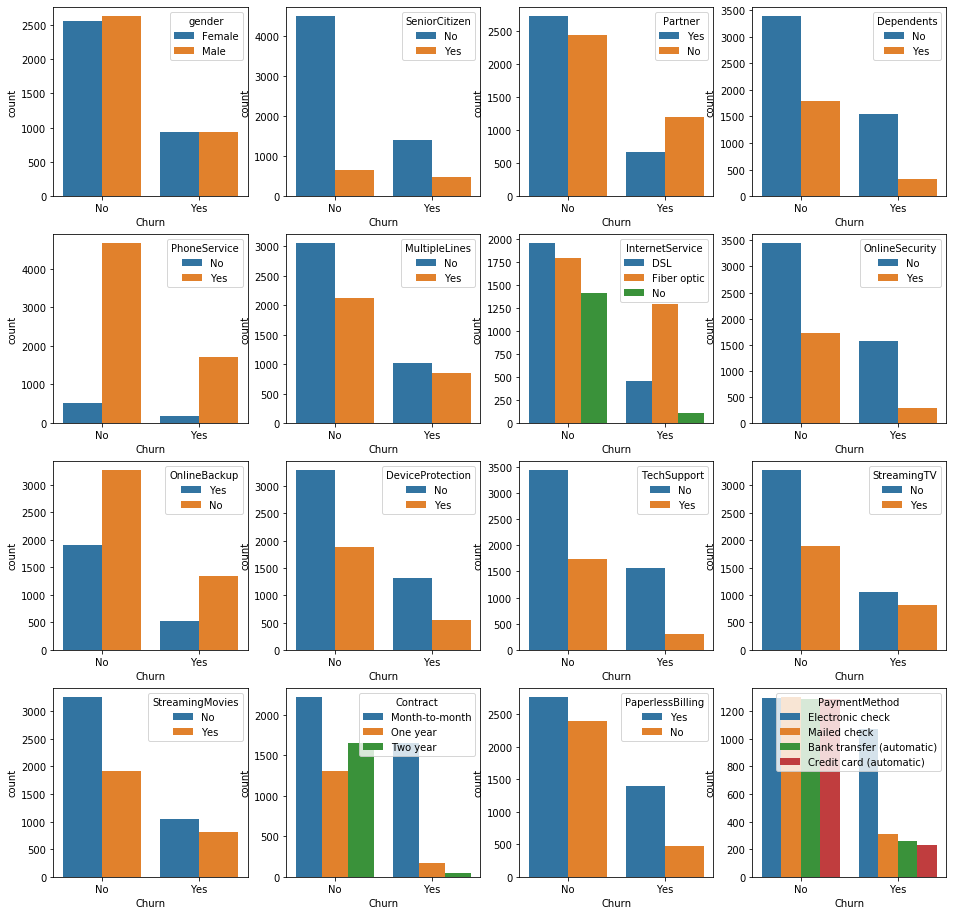

In [14]:
fig, axes = plt.subplots(4, 4,figsize=(16, 16))

iter=0
for x_iter in [0,1,2,3]:
    for y_iter in [0,1,2,3]:
        abc= category_cols[iter]
        sns.countplot( x= "Churn", data=telcom,  hue=abc, orient='v' , ax=axes[x_iter,y_iter])
        iter=iter+1

From the above countplot, the following can be inferred.

-the gender distriubutions within churn looks pretty much the same

-We have twice as much Senior Citizens in Churn

-people with Churn have less partners

-people with Churn have less dependents

-distributions of PhoneService are pretty much the same

-people with Churn have slightly greater MultipleLines

-people with Churn have less DSL and twice as much FiberOptic

-people with NonChurn have twice as much OnlineSecurity than Churn

-people with Churn have less OnlineBackup than NonChurn ones

-people with Churn have greater StreamingTV, streamingMovies, Paperlessbilling than NonChurn ones

-people with Churn, most frequently pay with Electronic Check comparing to NonChurn ones

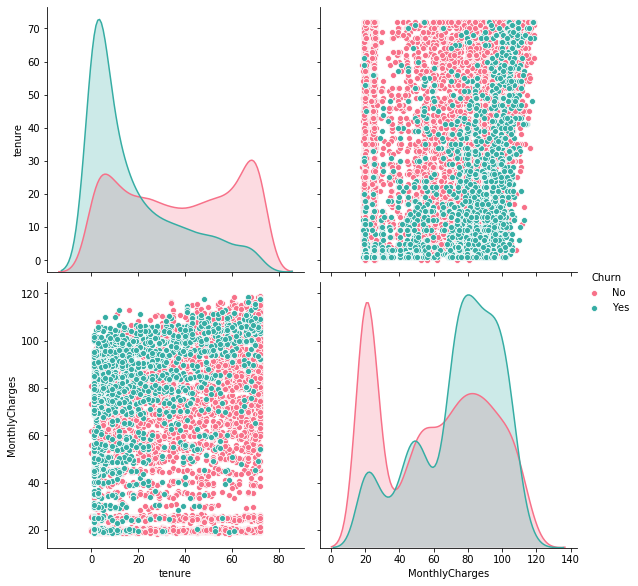

In [15]:
sns.pairplot(telcom[['tenure','MonthlyCharges', 'Churn']], hue='Churn', height=4, palette='husl')
plt.show()

### Label encoding categorical coloumns attributes.

In [16]:
le = preprocessing.LabelEncoder()
for i in category_cols:
    telcom[i]=le.fit_transform(telcom[i])

In [17]:
telcom.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.5,No
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,2,99.65,820.5,Yes
6,1,0,0,1,22,1,1,1,0,1,0,0,1,0,0,1,1,89.10,1949.4,No
7,0,0,0,0,10,0,0,0,1,0,0,0,0,0,0,0,3,29.75,301.9,No
8,0,0,1,0,28,1,1,1,0,0,1,1,1,1,0,1,2,104.80,3046.05,Yes
9,1,0,0,1,62,1,0,0,1,1,0,0,0,0,1,0,0,56.15,3487.95,No


In [41]:
telcom['Churn']=telcom['Churn'].replace({'Yes':1, 'No':0})

### Correlation Matrix

In [42]:
corr=telcom.corr()
corr.style.background_gradient()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.002236,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.032160,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000513,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.044030,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,-0.029835,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,0.387266,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.011346,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.171240,0.490912,0.469042,0.040033
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,0.011346,1.000000,-0.392174,-0.313708,-0.305757,-0.388535,-0.241330,-0.250144,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,-0.392174,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,-0.149112,0.296447,0.412619,-0.171270
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,-0.313708,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.170720,0.441529,0.510100,-0.082307


Heat map of correlation Matrix

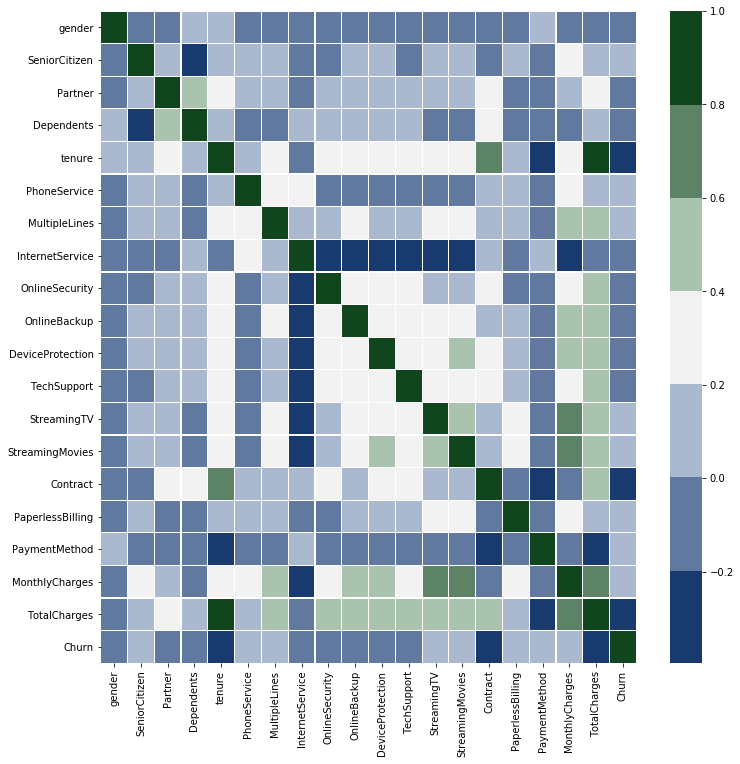

In [43]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap=sns.diverging_palette(255, 133, s=85, l=25, n=7))

In [47]:
#I forgot, TotalCharges should be numerical but is recoginzed as object by pandas hence it contains some junk values string,
telcom['TotalCharges'] = telcom['TotalCharges'].replace(' ', np.nan)

In [48]:
telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'], errors='coerce')
telcom.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [49]:
idx =telcom['TotalCharges'].isna()
telcom=telcom[~idx]
telcom.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


## Train and Test Split

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(telcom.drop('Churn',axis=1), 
                                                    telcom['Churn'], test_size=0.30, 
                                                    random_state=101)

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
log_predictions = logmodel.predict(X_test)

In [61]:
print(confusion_matrix(y_test,log_predictions))

[[1400  180]
 [ 248  282]]


In [62]:
accuracy=accuracy_score(y_test,log_predictions)
print(accuracy)

0.7971563981042654


## Random Forest Model Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=100)
rfm_model=rfm.fit(X_train, y_train)

In [65]:
rfm_pred = rfm.predict(X_test)
print(confusion_matrix(y_test,rfm_pred))

[[1406  174]
 [ 261  269]]


In [67]:
accuracy=accuracy_score(y_test,rfm_pred)
accuracy

0.7938388625592417

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
pred_tree = dt.predict(X_test)

In [70]:
accuracy=accuracy_score(y_test,pred_tree)
accuracy

0.7260663507109004

## KNN Classifier

In [1]:
D={([0,1],1.2),([2,1],2.1),([3,2],0.1),([1,2],1.5),([1,3],0.2),([2,3],0.5)}

TypeError: unhashable type: 'list'

In [72]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=10)
knn_model=knn.fit(X_train, y_train)

In [74]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))

[[1462  118]
 [ 334  196]]


In [76]:
accuracy=accuracy_score(y_test,knn_pred)
accuracy

0.785781990521327

### The one with the best accuracy is logistic regression

# Clickable GUI

In [80]:
import pickle
#save the model to disk
filename = 'finalized_model.sav'
pickle.dump(logmodel, open(filename, 'wb'))

In [147]:
import tkinter as tk
from tkinter import *
win = tk.Tk()
win.title('Churn_Predictions')


#Gender 
gender=ttk.Label(win,text="Gender")
gender.grid(row=0,column=0,sticky=tk.W)
 
n = tk.StringVar() 
mf = ttk.Combobox(win, width = 16, textvariable = n)
mf['values'] = (
    'Male',
    'Female'
    ) 

mf.grid(column = 1, row = 0) 
mf.current()



#Senior Citizen
citizen=ttk.Label(win,text="Senior Citizen")
citizen.grid(row=1,column=0,sticky=tk.W)

n1 = tk.StringVar() 
sn = ttk.Combobox(win, width = 16, textvariable = n1)
sn['values'] = (
    '1',
    '0'
    ) 

sn.grid(row=1,column=1) 
sn.current()

#Partner
Partner=ttk.Label(win,text="Partner")
Partner.grid(row=2,column=0,sticky=tk.W)

n2 = tk.StringVar() 
yn = ttk.Combobox(win, width = 16, textvariable = n2)
yn['values'] = (
    'Yes',
    'No'
    ) 

yn.grid(row=2,column=1) 
yn.current()

#Dependents
Dependents=ttk.Label(win,text="Dependents")
Dependents.grid(row=3,column=0,sticky=tk.W)

n3 = tk.StringVar() 
yn = ttk.Combobox(win, width = 16, textvariable = n3)
yn['values'] = (
    'Yes',
    'No'
    ) 

yn.grid(row=3,column=1) 
yn.current()

#Tenure
Tenure=ttk.Label(win,text="Tenure")
Tenure.grid(row=4,column=0,sticky=tk.W)
t=tk.Entry(win)
t.grid(row=4,column=1)

#Phone Services
Phone=ttk.Label(win,text="Phone Services")
Phone.grid(row=5,column=0,sticky=tk.W)

n4 = tk.StringVar() 
yn = ttk.Combobox(win, width = 16, textvariable = n4)
yn['values'] = (
    'Yes',
    'No'
    ) 

yn.grid(row=5,column=1) 
yn.current()

#Multiple Lines
Multiple=ttk.Label(win,text="Multiple Lines")
Multiple.grid(row=6,column=0,sticky=tk.W)

n5 = tk.StringVar() 
yn = ttk.Combobox(win, width = 16, textvariable = n5)
yn['values'] = (
    'Yes',
    'No'
    ) 

yn.grid(row=6,column=1) 
yn.current()

#Internet Service
Internet=ttk.Label(win,text="Internet Service")
Internet.grid(row=7,column=0,sticky=tk.W)

n6 = tk.StringVar() 
intrnt = ttk.Combobox(win, width = 16, textvariable = n6)
intrnt['values'] = (
    'DSL',
    'Fibre Optic',
    'No'
    ) 

intrnt.grid(row=7,column=1) 
intrnt.current()

#Online Security
OnlineS=ttk.Label(win,text="Online Security")
OnlineS.grid(row=8,column=0,sticky=tk.W)

n7 = tk.StringVar() 
yn = ttk.Combobox(win, width = 16, textvariable = n7)
yn['values'] = (
    'Yes',
    'No'
    ) 

yn.grid(row=8,column=1) 
yn.current()

#Online Backup
OnlineB=ttk.Label(win,text="Online Backup")
OnlineB.grid(row=9,column=0,sticky=tk.W)

n8 = tk.StringVar() 
yn = ttk.Combobox(win, width = 16, textvariable = n8)
yn['values'] = (
    'Yes',
    'No'
    ) 

yn.grid(row=9,column=1) 
yn.current()

#Device Protection
Device=ttk.Label(win,text="Device Protection")
Device.grid(row=10,column=0,sticky=tk.W)

n9 = tk.StringVar() 
yn = ttk.Combobox(win, width = 16, textvariable = n9)
yn['values'] = (
    'Yes',
    'No'
    ) 

yn.grid(row=10,column=1) 
yn.current()

#Tech Support
Tech=ttk.Label(win,text="Tech Support")
Tech.grid(row=11,column=0,sticky=tk.W)

n10 = tk.StringVar() 
yn = ttk.Combobox(win, width = 16, textvariable = n10)
yn['values'] = (
    'Yes',
    'No'
    ) 

yn.grid(row=11,column=1) 
yn.current()

#StreamingTV
StreamingTV=ttk.Label(win,text="StreamingTV")
StreamingTV.grid(row=12,column=0,sticky=tk.W)

n11 = tk.StringVar() 
yn = ttk.Combobox(win, width = 16, textvariable = n11)
yn['values'] = (
    'Yes',
    'No'
    ) 

yn.grid(row=12,column=1) 
yn.current()

#StreamingMovies
StreamingM=ttk.Label(win,text="StreamingMovies")
StreamingM.grid(row=13,column=0,sticky=tk.W)

n12 = tk.StringVar() 
yn = ttk.Combobox(win, width = 16, textvariable = n12)
yn['values'] = (
    'Yes',
    'No'
    ) 

yn.grid(row=13,column=1) 
yn.current()

#Contract
Contract=ttk.Label(win,text="Contract")
Contract.grid(row=14,column=0,sticky=tk.W)

n13 = tk.StringVar() 
c = ttk.Combobox(win, width = 16, textvariable = n13)
c['values'] = (
    'Month-to-month',
    'One year',
    'Two year'
    ) 

c.grid(row=14,column=1) 
c.current()

#PaperlessBilling
PaperlessBilling=ttk.Label(win,text="PaperlessBilling")
PaperlessBilling.grid(row=15,column=0,sticky=tk.W)

n14 = tk.StringVar() 
yn = ttk.Combobox(win, width = 16, textvariable = n14)
yn['values'] = (
    'Yes',
    'No'
    ) 

yn.grid(row=15,column=1) 
yn.current()

#Payment Method
Payment=ttk.Label(win,text="Payment Method")
Payment.grid(row=16,column=0,sticky=tk.W)

n15 = tk.StringVar() 
pm = ttk.Combobox(win, width = 16, textvariable = n15)
pm['values'] = (
    'Credit card',
    'Electronic check',
    'Mailed check',
    'Bank transfer'
    ) 

pm.grid(row=16,column=1) 
pm.current()

#Monthly Charges
MonthlyC=ttk.Label(win,text="Monthly Charges")
MonthlyC.grid(row=17,column=0,sticky=tk.W)
mc=tk.Entry(win)
mc.grid(row=17,column=1)

#Total Charges
TotalC=ttk.Label(win,text="Total Charges")
TotalC.grid(row=18,column=0,sticky=tk.W)
tc=tk.Entry(win)
tc.grid(row=18,column=1)

lbl5 = Label(win, text="",font=("Times New Roman", 24),justify=CENTER)
lbl5.grid(column=1, row=20)


column_attr = [n.get(),n1.get(),n2.get(),n3.get(),n4.get(),n5.get(),n6.get(),n7.get(),n8.get(),n9.get(),n10.get(),n11.get(),n12.get(),n13.get(),n14.get(),n15.get(),t.get(),mc.get(),tc.get()]

l1=[]
#defining functions
    
def logreg():
   
    
    
 


#Predict Button
MyButton2=Button(win, text="Predict", width=10, command=logreg)
MyButton2.grid(row=20, column=0)


win.mainloop()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 275)